In [1]:
import numpy as np
import numpy.linalg as npla
import matplotlib
import matplotlib.pyplot as plt
import os
import os.path as osp

## KITTI Plots

In [2]:
gt_root = '/workspace/raid/krb/kitti-raw/'
root = '/home/krb/Documents/steam_icp/results/kitti_raw/'
algo = 'steam_lo'
pred_files = sorted([osp.join(root, algo, f) for f in os.listdir(osp.join(root, algo)) if f.endswith('.txt')])
gt_files = sorted([osp.join(gt_root, seq, seq + '.txt') for seq in os.listdir(gt_root) if '0' in seq])
assert len(pred_files) == len(gt_files)

In [3]:
for gt_file, pred_file in zip([gt_files[8]], [pred_files[8]]):
    T_gt = []
    T_pred = []
    T = np.eye(4)
    with open(gt_file) as f:
        for line in f.readlines():
            T = np.eye(4, dtype=np.float64)
            T[:3, :4] = np.array([float(x) for x in line.split()]).reshape(3, 4)
            T_gt.append(np.copy(T))
    with open(pred_file) as f:
        for line in f.readlines():
            T = np.eye(4, dtype=np.float64)
            T[:3, :4] = np.array([float(x) for x in line.split()]).reshape(3, 4)
            T_pred.append(np.copy(T))
    assert len(T_gt) == len(T_pred)
    break

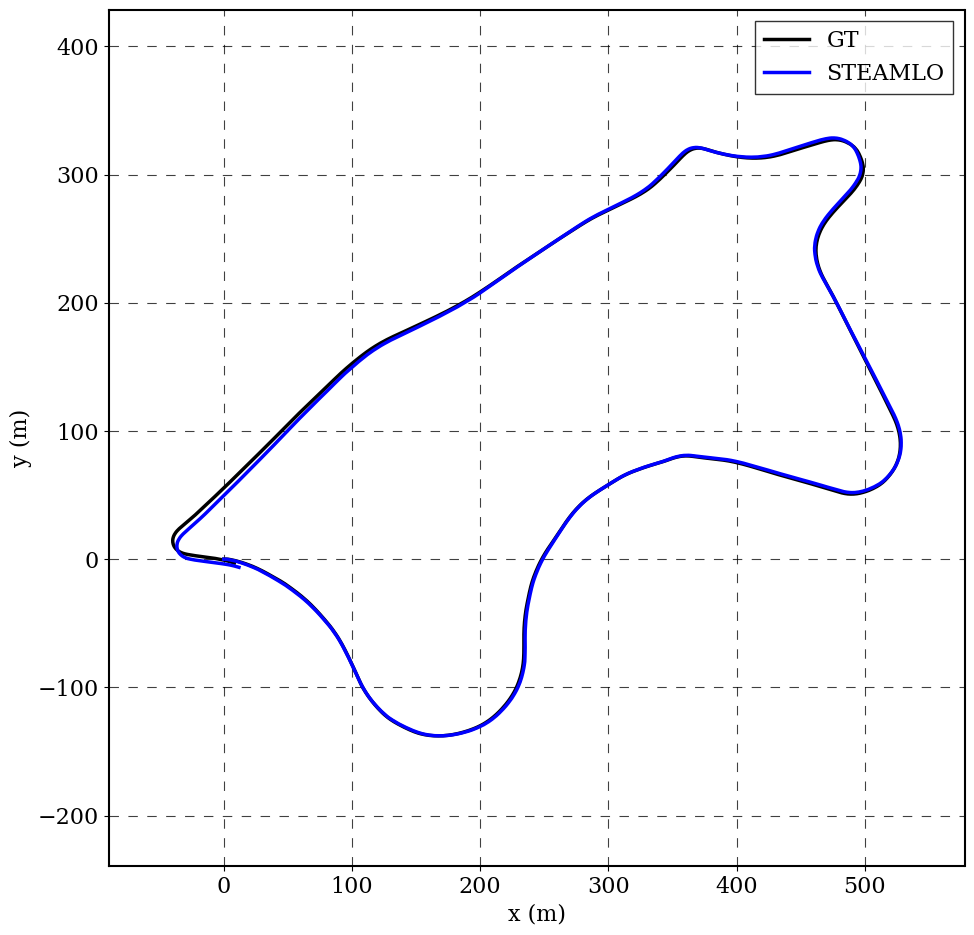

In [4]:
matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})


xy_gt = np.array([[T[2, 3], T[0, 3]] for T in T_gt])
xy_pred = np.array([[T[2, 3], T[0, 3]] for T in T_pred])


fig = plt.figure(figsize=(10, 10), tight_layout=True)


xmin = min(np.min(xy_gt[:, 0]), np.min(xy_pred[:, 0]))
xmax = min(np.max(xy_gt[:, 0]), np.max(xy_pred[:, 0]))
ymin = min(np.min(xy_gt[:, 1]), np.min(xy_pred[:, 1]))
ymax = min(np.max(xy_gt[:, 1]), np.max(xy_pred[:, 1]))
xwidth = xmax - xmin
ywidth = ymax - ymin
border = 50.0
if ywidth < xwidth:
    diff = xwidth - ywidth
    plt.xlim(xmin - border, xmax + border)
    plt.ylim(ymin - diff / 2 - border, ymax + diff / 2 + border)
else:
    diff = ywidth - xwidth
    plt.ylim(ymin - border, ymax + border)
    plt.xlim(xmin - diff / 2 - border, xmax + diff / 2 + border)

plt.grid(color='k', which='both', linestyle='--', alpha=0.75, dashes=(8.5, 8.5))

plt.plot(xy_gt[:, 0], xy_gt[:, 1], 'k', linewidth=2.5, label='GT')
plt.plot(xy_pred[:, 0], xy_pred[:, 1], 'b', linewidth=2.5, label='STEAMLO')
plt.gca().set_aspect('equal')
plt.legend(loc="best", edgecolor='k', fancybox=False)


plt.xlabel('x (m)', fontsize=16)
plt.ylabel('y (m)', fontsize=16)


plt.show()

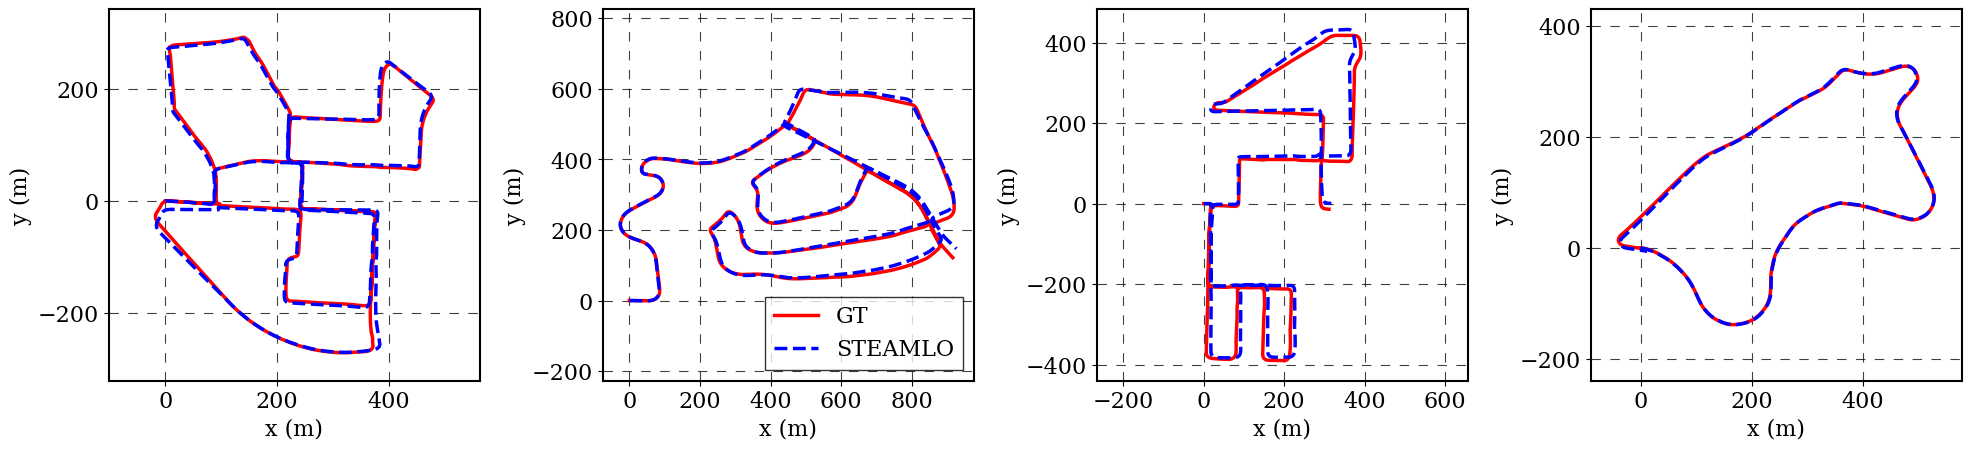

In [5]:
matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})


fig, axs = plt.subplots(1, 4, figsize=(20, 10), tight_layout=True)

i = 0
for gt_file, pred_file in zip([gt_files[0], gt_files[2], gt_files[7], gt_files[8]], [pred_files[0], pred_files[2], pred_files[7], pred_files[8]]):
    T_gt = []
    T_pred = []
    T = np.eye(4)
    with open(gt_file) as f:
        for line in f.readlines():
            T = np.eye(4, dtype=np.float64)
            T[:3, :4] = np.array([float(x) for x in line.split()]).reshape(3, 4)
            T_gt.append(np.copy(T))
    with open(pred_file) as f:
        for line in f.readlines():
            T = np.eye(4, dtype=np.float64)
            T[:3, :4] = np.array([float(x) for x in line.split()]).reshape(3, 4)
            T_pred.append(np.copy(T))
    assert len(T_gt) == len(T_pred)
    

    xy_gt = np.array([[T[2, 3], T[0, 3]] for T in T_gt])
    xy_pred = np.array([[T[2, 3], T[0, 3]] for T in T_pred])
    
    axs[i].plot(xy_gt[:, 0], xy_gt[:, 1], 'r', linewidth=2.5, label='GT')
    axs[i].plot(xy_pred[:, 0], xy_pred[:, 1], 'b--', linewidth=2.5, label='STEAMLO')

    xmin = min(np.min(xy_gt[:, 0]), np.min(xy_pred[:, 0]))
    xmax = max(np.max(xy_gt[:, 0]), np.max(xy_pred[:, 0]))
    ymin = min(np.min(xy_gt[:, 1]), np.min(xy_pred[:, 1]))
    ymax = max(np.max(xy_gt[:, 1]), np.max(xy_pred[:, 1]))
    xwidth = xmax - xmin
    ywidth = ymax - ymin
    border = 50.0
    if ywidth < xwidth:
        diff = xwidth - ywidth
        
        axs[i].set_xlim(xmin - border, xmax + border)
        axs[i].set_ylim(ymin - diff / 2 - border, ymax + diff / 2 + border)
    else:
        diff = ywidth - xwidth
        axs[i].set_ylim(ymin - border, ymax + border)
        axs[i].set_xlim(xmin - diff / 2 - border, xmax + diff / 2 + border)

    start, end = axs[i].get_xlim()
    xticks = [0]
    div = 200
    x = div
    while x < end:
        xticks.append(x)
        x += div
    x = -div
    while x > start:
        xticks.append(x)
        x -= div
    xticks.sort()

    start, end = axs[i].get_ylim()
    yticks = [0]
    div = 200
    y = div
    while y < end:
        yticks.append(y)
        y += div
    y = -div
    while y > start:
        yticks.append(y)
        y -= div
    yticks.sort()
    
    axs[i].xaxis.set_ticks(xticks)
    axs[i].yaxis.set_ticks(yticks) 
    
    axs[i].set_aspect('equal')
    axs[i].grid(color='k', which='both', linestyle='--', alpha=0.75, dashes=(8.5, 8.5))
    # axs[i].legend(loc="best", edgecolor='k', fancybox=False)
    
    axs[i].set_xlabel('x (m)', fontsize=16)
    axs[i].set_ylabel('y (m)', fontsize=16)

    i += 1

axs[1].legend(loc="best", edgecolor='k', fancybox=False)

plt.savefig(osp.join(root, 'odom.pdf'), bbox_inches='tight', pad_inches=0.0)
plt.show()

## Boreas Odometry Plots

In [6]:
def load_poses(fname):
    T_arr = []
    with open(fname) as f:
        for line in f.readlines():
            T = np.eye(4, dtype=np.float64)
            T[:3, :4] = np.array([float(x) for x in line.split()][:12]).reshape(3, 4)
            T_arr.append(np.copy(T))
    return T_arr

def load_covariances(fname, fname2=None):
#     if fname2 is None:
#         fname2 = fname
    Sigma_arr = []
    f = open(fname)
    lines = f.readlines()
    f.close()
    if fname2 is not None:
        f = open(fname2)
        lines2 = f.readlines()
        f.close()
    else:
        lines2 = lines
    
    Sigma_prev = np.eye(6)
    T_prev = np.eye(4)
    i = 0
    for l, l2 in zip(lines, lines2):
#     for line in f.readlines():
        Sigma = np.array([float(x) for x in l.split()][34:34+18*18]).reshape(18, 18)[:6, :6]
        T = np.eye(4, dtype=np.float64)
        T[:3, :4] = np.array([float(x) for x in l2.split()][:12]).reshape(3, 4)
        if i > 0:
            T_hat = npla.inv(T) @ T_prev
            Ad_T = se3op.tranAd(T_hat)
            Sigma_out = Sigma + Ad_T @ Sigma_prev @ Ad_T.T
        else:
            Sigma_out = Sigma
        Sigma_arr.append(np.copy(Sigma_out))
        i += 1
        Sigma_prev = np.copy(Sigma)
        T_prev = np.copy(T)
    return Sigma_arr

def roll(r):
    return np.array(
        [[1, 0, 0], [0, np.cos(r), np.sin(r)], [0, -np.sin(r), np.cos(r)]],
        dtype=np.float64,
    )


def pitch(p):
    return np.array(
        [[np.cos(p), 0, -np.sin(p)], [0, 1, 0], [np.sin(p), 0, np.cos(p)]],
        dtype=np.float64,
    )


def yaw(y):
    return np.array(
        [[np.cos(y), np.sin(y), 0], [-np.sin(y), np.cos(y), 0], [0, 0, 1]],
        dtype=np.float64,
    )


def yawPitchRollToRot(y, p, r):
    return roll(r) @ pitch(p) @ yaw(y)

def get_transform(gt):
    """Retrieve 4x4 homogeneous transform for a given parsed line of the ground truth pose csv
    Args:
        gt (List[float]): parsed line from ground truth csv file
    Returns:
        np.ndarray: 4x4 transformation matrix (pose of sensor)
    """
    T = np.identity(4, dtype=np.float64)
    C_enu_sensor = yawPitchRollToRot(gt[9], gt[8], gt[7])
    T[0, 3] = gt[1]
    T[1, 3] = gt[2]
    T[2, 3] = gt[3]
    T[0:3, 0:3] = C_enu_sensor
    return T

def load_gt_poses(gtfile):
    T_gt = []
    with open(gtfile) as f:
        header = f.readline()
        for line in f.readlines():
            gt = [float(x) for x in line.split(',')]
            T = get_transform(gt)
            T_gt.append(np.copy(T))
    return T_gt

In [7]:
gt_root = '/workspace/nas/ASRL/2021-Boreas/'
root_velodyne = '/home/krb/Documents/steam_icp/results/boreas_velodyne/'
root_navtech = '/home/krb/Documents/steam_icp/results/boreas_navtech/'
algos = ['steamlo', 'steamlio', 'steam_ro', 'steam_rio']

seqs = sorted([f.split('_')[0] for f in os.listdir(osp.join(root_velodyne, algos[0])) if f.startswith('boreas-20')])
for seq in seqs:
    print(seq)

seq = 'boreas-2021-01-26-10-59'

steamlo_file = osp.join(root_velodyne, 'steamlo', seq + '_poses.txt')
steamlio_file = osp.join(root_velodyne, 'steamlio', seq + '_poses.txt')
steamro_file = osp.join(root_navtech, 'steamro', seq + '_poses.txt')
steamrio_file = osp.join(root_navtech, 'steamrio', seq + '_poses.txt')
gt_file = osp.join(gt_root, seq, 'applanix', 'lidar_poses.csv')
T_applanix_lidar = np.loadtxt(osp.join(gt_root, seq, 'calib', 'T_applanix_lidar.txt'))
T_lidar_applanix = npla.inv(T_applanix_lidar)
T_radar_lidar = np.loadtxt(osp.join(gt_root, seq, 'calib', 'T_radar_lidar.txt'))
T_lidar_radar = npla.inv(T_radar_lidar)
print(T_radar_lidar)

# for gt_file, pred_file in zip([gt_files[8]], [pred_files[8]]):


T_gt = []
T_steamlo = []
T_steamlio = []
T_steamro = []
T_steamrio = []
T = np.eye(4)

T_steamlo = load_poses(steamlo_file)
T_steamlio = load_poses(steamlio_file)
T_steamro = load_poses(steamro_file)
T_steamrio = load_poses(steamrio_file)

zup2zdown = np.array([1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1]).reshape(4, 4)

T_steamro = [T_lidar_radar @ zup2zdown @ T @ zup2zdown @ T_lidar_radar for T in T_steamro]
T_steamrio = [T_lidar_radar @ zup2zdown @ T @ zup2zdown @ T_lidar_radar for T in T_steamrio]

T_gt = load_gt_poses(gt_file)
T_il0 = np.copy(T_gt[0])
T_li0 = npla.inv(T_il0)

T_gt = [T_li0 @ T for T in T_gt]



matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})


xy_gt = np.array([[T[0, 3], T[1, 3]] for T in T_gt])
xy_steamlo = np.array([[T[0, 3], T[1, 3]] for T in T_steamlo])
xy_steamlio = np.array([[T[0, 3], T[1, 3]] for T in T_steamlio])
xy_steamro = np.array([[T[0, 3], T[1, 3]] for T in T_steamro])
xy_steamrio = np.array([[T[0, 3], T[1, 3]] for T in T_steamrio])


fig = plt.figure(figsize=(10, 10), tight_layout=True)


xmin = min(np.min(xy_gt[:, 0]), np.min(xy_steamlo[:, 0]), np.min(xy_steamlio[:, 0]), np.min(xy_steamro[:, 0]), np.min(xy_steamrio[:, 0]))
xmax = max(np.max(xy_gt[:, 0]), np.max(xy_steamlo[:, 0]), np.max(xy_steamlio[:, 0]), np.max(xy_steamro[:, 0]), np.max(xy_steamrio[:, 0]))
ymin = min(np.min(xy_gt[:, 1]), np.min(xy_steamlo[:, 1]), np.min(xy_steamlio[:, 1]), np.min(xy_steamro[:, 1]), np.min(xy_steamrio[:, 1]))
ymax = max(np.max(xy_gt[:, 1]), np.max(xy_steamlo[:, 1]), np.max(xy_steamlio[:, 1]), np.max(xy_steamro[:, 1]), np.max(xy_steamrio[:, 1]))
xwidth = xmax - xmin
ywidth = ymax - ymin
border = 50.0
if ywidth < xwidth:
    diff = xwidth - ywidth
    plt.xlim(xmin - border, xmax + border)
    plt.ylim(ymin - diff / 2 - border, ymax + diff / 2 + border)
else:
    diff = ywidth - xwidth
    plt.ylim(ymin - border, ymax + border)
    plt.xlim(xmin - diff / 2 - border, xmax + diff / 2 + border)

plt.grid(color='k', which='both', linestyle='--', alpha=0.75, dashes=(8.5, 8.5))

plt.plot(xy_gt[:, 0], xy_gt[:, 1], linewidth=2.5, label='GT')
plt.plot(xy_steamlo[:, 0], xy_steamlo[:, 1], linestyle='-.', linewidth=2.5, label='STEAM-LO')
plt.plot(xy_steamlio[:, 0], xy_steamlio[:, 1], linestyle='--', linewidth=2.5, label='STEAM-LIO')
plt.plot(xy_steamro[:, 0], xy_steamro[:, 1], linestyle='--', linewidth=2.5, label='STEAM-RO')
plt.plot(xy_steamrio[:, 0], xy_steamrio[:, 1], linestyle='-', linewidth=2.5, label='STEAM-RIO')
plt.gca().set_aspect('equal')
plt.legend(loc="best", edgecolor='k', fancybox=False)


plt.xlabel('x (m)', fontsize=16)
plt.ylabel('y (m)', fontsize=16)

plt.savefig(osp.join(root_velodyne, '{}.pdf'.format(seq)), bbox_inches='tight', pad_inches=0.0)
plt.show()

boreas-2020-12-04-14-00
boreas-2020-12-04-14-00
boreas-2021-01-26-10-59
boreas-2021-01-26-10-59
boreas-2021-02-09-12-55
boreas-2021-02-09-12-55
boreas-2021-03-09-14-23
boreas-2021-03-09-14-23
boreas-2021-04-22-15-00
boreas-2021-04-22-15-00
boreas-2021-06-29-18-53
boreas-2021-06-29-18-53
boreas-2021-06-29-20-43
boreas-2021-06-29-20-43
boreas-2021-09-08-21-00
boreas-2021-09-08-21-00
boreas-2021-09-09-15-28
boreas-2021-09-09-15-28
boreas-2021-10-05-15-35
boreas-2021-10-05-15-35
boreas-2021-10-26-12-35
boreas-2021-10-26-12-35
boreas-2021-11-06-18-55
boreas-2021-11-06-18-55
boreas-2021-11-28-09-18
boreas-2021-11-28-09-18
[[ 0.68233939  0.73103554  0.          0.        ]
 [ 0.73103554 -0.68233939  0.          0.        ]
 [ 0.          0.         -1.          0.365     ]
 [ 0.          0.          0.          1.        ]]


KeyboardInterrupt: 

In [4]:
import open3d as o3d
from matplotlib import cm


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2023-12-14 21:42:16,356 - utils - Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO - 2023-12-14 21:42:16,357 - utils - NumExpr defaulting to 8 threads.


In [5]:
root = '/home/krb/ASRL/temp/steam_icp/boreas_navtech/steamrio'
os.listdir(root)
radar_maps = sorted([f for f in os.listdir(root) if 'map' in f])
print(radar_maps)

['boreas-2021-02-09-12-55-101.003109_map.txt', 'boreas-2021-02-09-12-55-103.002514_map.txt', 'boreas-2021-02-09-12-55-104.752529_map.txt', 'boreas-2021-02-09-12-55-106.252553_map.txt', 'boreas-2021-02-09-12-55-107.501315_map.txt', 'boreas-2021-02-09-12-55-108.751333_map.txt', 'boreas-2021-02-09-12-55-110.002594_map.txt', 'boreas-2021-02-09-12-55-111.250738_map.txt', 'boreas-2021-02-09-12-55-112.500751_map.txt', 'boreas-2021-02-09-12-55-113.751397_map.txt', 'boreas-2021-02-09-12-55-115.002663_map.txt', 'boreas-2021-02-09-12-55-116.250176_map.txt', 'boreas-2021-02-09-12-55-117.500810_map.txt', 'boreas-2021-02-09-12-55-118.751455_map.txt', 'boreas-2021-02-09-12-55-120.002094_map.txt', 'boreas-2021-02-09-12-55-121.251486_map.txt', 'boreas-2021-02-09-12-55-122.750877_map.txt', 'boreas-2021-02-09-12-55-124.252145_map.txt', 'boreas-2021-02-09-12-55-125.501538_map.txt', 'boreas-2021-02-09-12-55-126.751547_map.txt', 'boreas-2021-02-09-12-55-128.002189_map.txt', 'boreas-2021-02-09-12-55-129.2528

In [ ]:
# /home/krb/Documents/steam_icp/results/boreas_navtech/'
cmap = cm.gist_rainbow
points = np.loadtxt(osp.join(root, radar_maps[0]))
intensity = points[:, 3]
points = points[:, :3]

vmin = 0
vmax = 100

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
intensity = np.clip(intensity, vmin, vmax)
colors = cmap((intensity - vmin) / (vmax - vmin))[:, 0:3]
pcd.colors = o3d.utility.Vector3dVector(colors)

vis = o3d.visualization.Visualizer()
vis.create_window()

vis.add_geometry(pcd)

o3dimg = vis.capture_screen_float_buffer(do_render=True)

out = np.array(o3dimg) * 255




In [255]:
print(xyz.shape)

(3115, 4)


WARNING - 2023-12-14 21:40:10,382 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


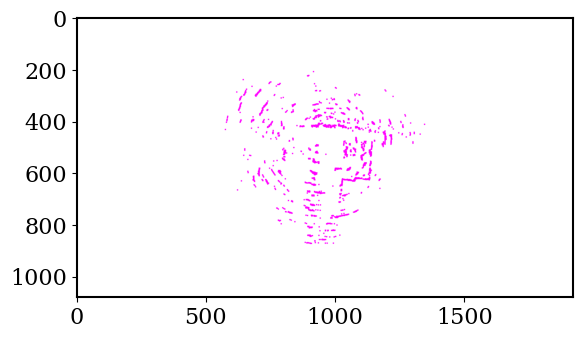

In [260]:
plt.imshow(out)

In [56]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import matplotlib
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

viridis = mpl.colormaps['viridis'].resampled(8)
colors = ["#0000FF", "#00FF00", "#FFFF00", "#FF0000"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

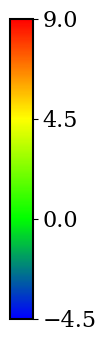

In [79]:
matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})
fig = plt.figure(figsize=(0.25,30))

ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='vertical', 
                                      norm=mpl.colors.Normalize(-4.5, 9.0),
                               cmap=cmap1, ticks=[-4.5, 0., 4.5, 9.])
# cb.set_facecolor((0.2, 0.2, 0.2, 1.0))
# cb.alpha = 0.
cb.set_alpha(0.)

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})
plt.savefig('/home/krb/Downloads/just_colorbar.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

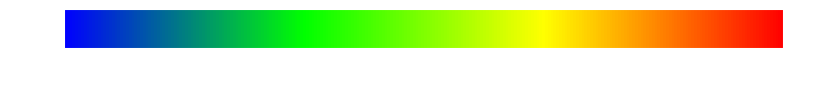

In [102]:
matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})
fig = plt.figure(figsize=(8,4))

ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', 
                                      norm=mpl.colors.Normalize(-4.5, 9.0),
                               cmap=cmap1, ticks=[-4.5, 0., 4.5, 9.])
# cb.xaxis.label.set_color('white')
# cb.set_facecolor((0.2, 0.2, 0.2, 1.0))
# cb.alpha = 0.
cb.set_alpha(0.)
cb.ax.tick_params(labelsize=32)
# for ax in axes:
ax.tick_params(color='white', labelcolor='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})
plt.savefig('/home/krb/Downloads/just_colorbar_white.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

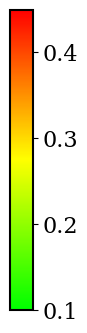

In [78]:
colors2 = ["#00FF00", "#FFFF00", "#FF0000"]
cmap2 = LinearSegmentedColormap.from_list("mycmap2", colors2)
fig = plt.figure(figsize=(0.25,30))
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='vertical', 
                                      norm=mpl.colors.Normalize(0.1, 0.45),
                               cmap=cmap2, ticks=[0.1, 0.2, 0.3, 0.4])
plt.savefig('/home/krb/Downloads/just_colorbar2.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

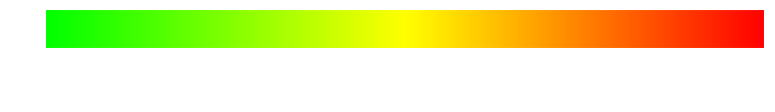

In [103]:
colors2 = ["#00FF00", "#FFFF00", "#FF0000"]
cmap2 = LinearSegmentedColormap.from_list("mycmap2", colors2)
fig = plt.figure(figsize=(8,4))
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
})
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', 
                                      norm=mpl.colors.Normalize(0.1, 0.45),
                               cmap=cmap2, ticks=[0.1, 0.2, 0.3, 0.4])
ax.tick_params(color='white', labelcolor='white')
cb.ax.tick_params(labelsize=32)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
plt.savefig('/home/krb/Downloads/just_colorbar2_white.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

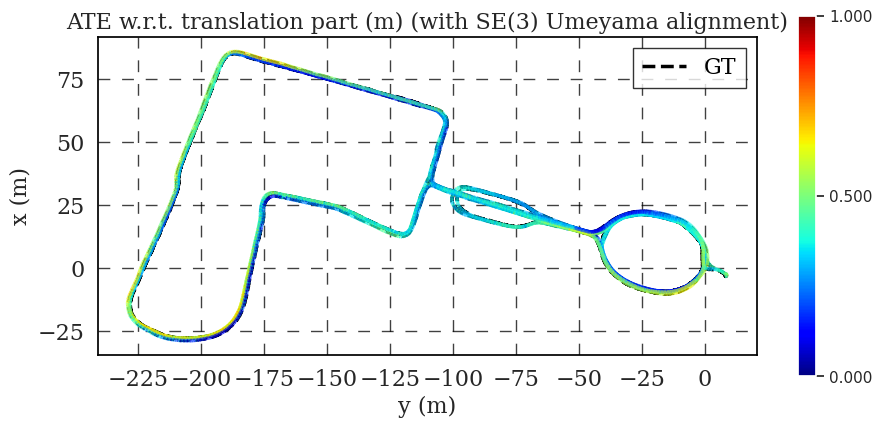

In [219]:
import pickle
out = pickle.load(open('/home/krb/Desktop/ncd_long_evo_plot.obj', 'rb'))
rawfig = out['raw']
fig = out['map']

dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = fig
fig.set_canvas(new_manager.canvas)

axs = fig.get_axes()
plt.xticks(font='serif', fontsize=16)
plt.yticks(font='serif', fontsize=16)
plt.xlabel('y (m)', fontsize=16, font='serif')
plt.ylabel('x (m)', fontsize=16, font='serif')
plt.title('ATE w.r.t. translation part (m) (with SE(3) Umeyama alignment)', font='serif', fontsize=16)

plt.grid(color='k', which='both', linestyle='--', alpha=0.75, dashes=(8.5, 8.5))
axs[0].set_facecolor('white')
axs[0].lines[0].set_color('black')
plt.gca().set_aspect('equal')



start, end = axs[0].get_xlim()
xticks = [0]
div = 25
x = div
while x < end:
    xticks.append(x)
    x += div
x = -div
while x > start:
    xticks.append(x)
    x -= div
xticks.sort()

start, end = axs[0].get_ylim()
yticks = [0]
div = 25
y = div
while y < end:
    yticks.append(y)
    y += div
y = -div
while y > start:
    yticks.append(y)
    y -= div
yticks.sort()

axs[0].xaxis.set_ticks(xticks)
axs[0].yaxis.set_ticks(yticks) 

axs[0].lines[0].set(linewidth=2.5)
axs[0].lines[0].set(label='GT')
axs[0].collections[0].set(linewidth=2.5)
# axs[0].collections[0].set(label='STEAM-LIO')

for spine in axs[0].spines.values():
    spine.set_edgecolor('black')

# axs[0].collections[0].colorbar.set(fontsize=16)
# print(axs[1].get_children()[6].set(font='serif'))

plt.legend(loc="best", edgecolor='k', fancybox=False)
plt.rc('font', size=16)
plt.rc('font', family='serif')

plt.savefig('/home/krb/Downloads/ncd_02.pdf', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [189]:
print(axs[0].lines[0])
print(axs[0].collections[0])

# fig.savefig('/home/krb/Downloads/try.pdf')

Line2D(reference)


IndexError: list index out of range

AttributeError: Axes.set() got an unexpected keyword argument 'font'

## Error vs. Time

In [11]:
from pylgmath import se3op

In [12]:
seq = 'boreas-2021-01-26-10-59'
# steamlio_file = osp.join(root_velodyne, 'steamlio', seq + '_debug.txt')
steamlio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_debug.txt')
steamlio_file2 = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_poses.txt')
sigmas = load_covariances(steamlio_file, steamlio_file2)

In [14]:
# gt_root = '/workspace/nas/ASRL/2021-Boreas/'
gt_root = '/workspace/raid/krb/boreas/'
root_velodyne = '/home/krb/Documents/steam_icp/results/boreas_velodyne/'
root_navtech = '/home/krb/Documents/steam_icp/results/boreas_navtech/'
algos = ['steamlio']

seqs = sorted([f.split('_')[0] for f in os.listdir(osp.join(root_velodyne, algos[0])) if f.startswith('boreas-20')])
for seq in seqs:
    print(seq)

seq = 'boreas-2021-01-26-10-59'

# steamlo_file = osp.join(root_velodyne, 'steamlo', seq + '_poses.txt')
# steamlio_file = osp.join(root_velodyne, 'steamlio', seq + '_debug.txt')
steamlio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_debug.txt')
steamlio_file2 = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_poses.txt')

steamrio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_navtech/steamrio/', seq + '_debug.txt')
steamrio_file2 = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_navtech/steamrio/', seq + '_poses.txt')

# steamro_file = osp.join(root_navtech, 'steamro', seq + '_poses.txt')
# steamrio_file = osp.join(root_navtech, 'steamrio', seq + '_poses.txt')
gt_file = osp.join(gt_root, seq, 'applanix', 'lidar_poses.csv')
T_applanix_lidar = np.loadtxt(osp.join(gt_root, seq, 'calib', 'T_applanix_lidar.txt'))
T_lidar_applanix = npla.inv(T_applanix_lidar)
T_radar_lidar = np.loadtxt(osp.join(gt_root, seq, 'calib', 'T_radar_lidar.txt'))
T_lidar_radar = npla.inv(T_radar_lidar)

T_gt = []
T_steamlo = []
T_steamlio = []
T_steamro = []
T_steamrio = []
T = np.eye(4)

# T_steamlo = load_poses(steamlo_file)
# T_steamlio = load_poses(steamlio_file)

sigmas = load_covariances(steamlio_file, steamlio_file2)



# T_steamro = load_poses(steamro_file)
# T_steamrio = load_poses(steamrio_file)

# zup2zdown = np.array([1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1]).reshape(4, 4)

# T_steamro = [T_lidar_radar @ zup2zdown @ T @ zup2zdown @ T_lidar_radar for T in T_steamro]
# T_steamrio = [T_lidar_radar @ zup2zdown @ T @ zup2zdown @ T_lidar_radar for T in T_steamrio]

# T_gt = load_gt_poses(gt_file)
T_gt = load_gt_poses(gt_file)
T_il0 = np.copy(T_gt[0])
T_li0 = npla.inv(T_il0)
T_gt = [T_li0 @ T for T in T_gt]

# steamlio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_poses.txt')
T_steamlio = load_poses(steamlio_file2)

matplotlib.rcParams.update({'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16,
                            'axes.linewidth': 1.5, 'font.family': 'serif', 'pdf.fonttype': 42})

errs = []
for i in range(1, len(T_steamlio)):
    T = npla.inv(T_gt[i]) @ T_gt[i - 1]
    T_hat = npla.inv(T_steamlio[i]) @ T_steamlio[i - 1]
    e = se3op.tran2vec(T_hat @ npla.inv(T))
    errs.append(e)
errs = np.array(errs)

# sigmas_rio = load_covariances(steamrio_file, steamrio_file2)
# gt_file = osp.join(gt_root, seq, 'applanix', 'radar_poses.csv')
# T_gt = load_gt_poses(gt_file)
# T_il0 = np.copy(T_gt[0])
# T_li0 = npla.inv(T_il0)
# T_gt = [T_li0 @ T for T in T_gt]
# T_steamrio = load_poses(steamrio_file2)
# T_steamrio = [zup2zdown @ T @ zup2zdown for T in T_steamrio]

# errsrio = []
# for i in range(1, len(T_steamrio)):
#     T = npla.inv(T_gt[i]) @ T_gt[i - 1]
#     T_hat = npla.inv(T_steamrio[i]) @ T_steamrio[i - 1]
#     e = se3op.tran2vec(T_hat @ npla.inv(T))
#     errsrio.append(e)

# errsrio = np.array(errsrio)

boreas-2020-12-04-14-00
boreas-2020-12-04-14-00
boreas-2021-01-26-10-59
boreas-2021-01-26-10-59
boreas-2021-01-26-10-59
boreas-2021-02-09-12-55
boreas-2021-02-09-12-55
boreas-2021-03-09-14-23
boreas-2021-03-09-14-23
boreas-2021-04-22-15-00
boreas-2021-04-22-15-00
boreas-2021-06-29-18-53
boreas-2021-06-29-18-53
boreas-2021-06-29-20-43
boreas-2021-06-29-20-43
boreas-2021-09-02-11-42
boreas-2021-09-08-21-00
boreas-2021-09-08-21-00
boreas-2021-09-09-15-28
boreas-2021-09-09-15-28
boreas-2021-10-05-15-35
boreas-2021-10-05-15-35
boreas-2021-10-26-12-35
boreas-2021-10-26-12-35
boreas-2021-11-06-18-55
boreas-2021-11-06-18-55
boreas-2021-11-28-09-18
boreas-2021-11-28-09-18


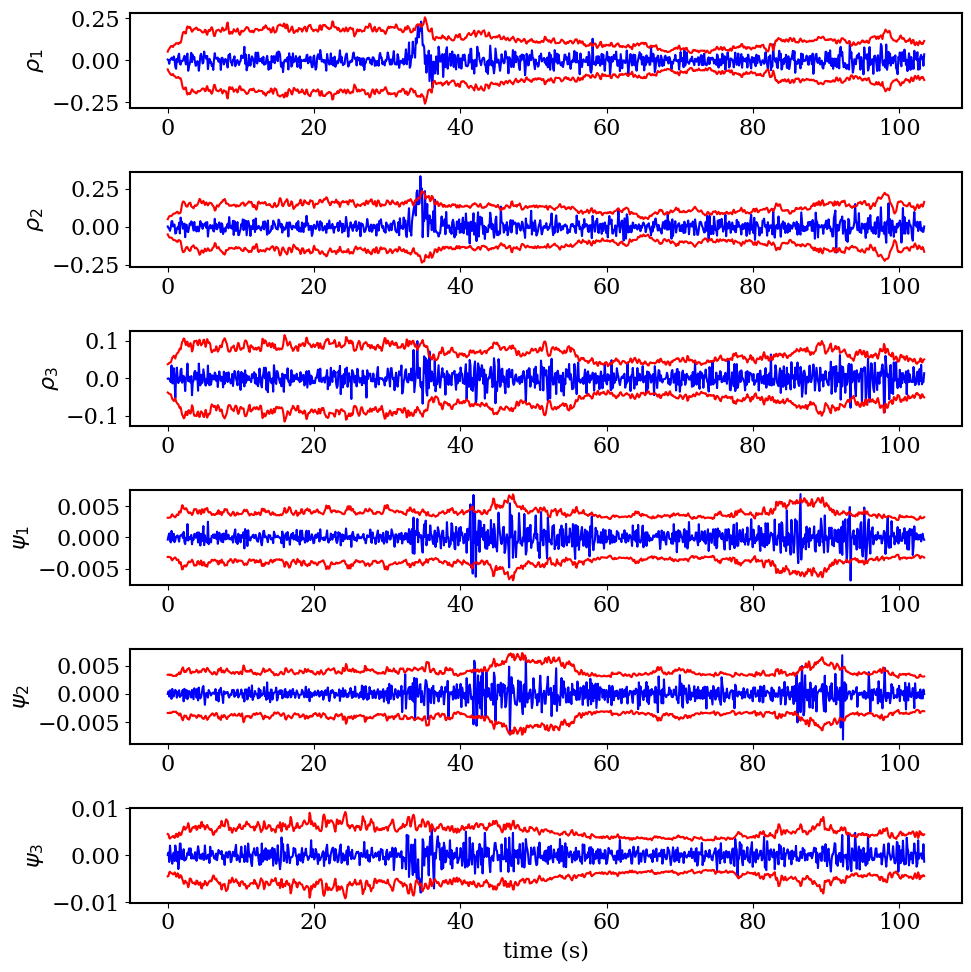

In [19]:
# fig = plt.figure(figsize=(10, 3), tight_layout=True)
fig, axs = plt.subplots(6, 1, figsize=(10, 10), tight_layout=True)
sigs = []
for sig in sigmas[2:]:
    sigs.append(np.sqrt(np.diag(sig)))
sigs = np.array(sigs)

times = []
with open(gt_file) as f:
    line = f.readline()
    for line in f.readlines():
        times.append(float(line.split(',')[0]))
times = np.array(times)
times = (times - times[0]) * 1.0e-6
        
N = 998
    
for i in range(6):
    axs[i].plot(times[:N], errs[:N, i], label='e', color='blue')
    axs[i].plot(times[:N], 3*sigs[:N, i], 'r', label='$3\sigma$')
    axs[i].plot(times[:N], -3*sigs[:N, i],'r')
# plt.plot(sigs[:, 0], label='$\sigma$')
# plt.plot(-sigs[:, 0], label='$\sigma$')
# plt.legend()
axs[0].set_ylabel('$\\rho_1$')
axs[1].set_ylabel('$\\rho_2$')
axs[2].set_ylabel('$\\rho_3$')
axs[3].set_ylabel('$\psi_1$')
axs[4].set_ylabel('$\psi_2$')
axs[5].set_ylabel('$\psi_3$')
axs[5].set_xlabel('time (s)')

plt.savefig(osp.join(root_velodyne, '{}-errs.pdf'.format(seq)), bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
nees = 0
for e, s in zip(errs, sigmas):
    nees += e.reshape(1, -1) @ npla.inv(s[:6, :6]) @ e.reshape(-1, 1)
nees /= (6 * len(errs))
print(nees)

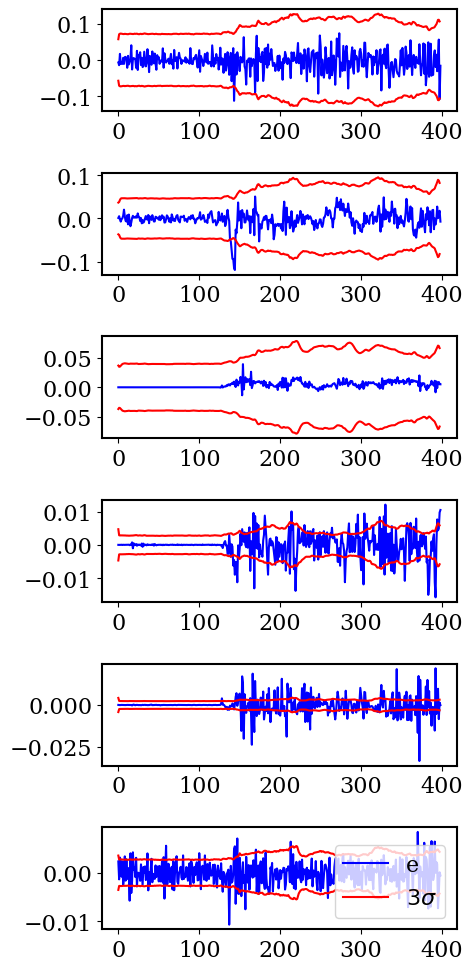

In [656]:
# fig = plt.figure(figsize=(10, 3), tight_layout=True)
fig, axs = plt.subplots(6, 1, figsize=(5, 10), tight_layout=True)
sigsrio = []
for sig in sigmas_rio[2:]:
    sigsrio.append(np.sqrt(np.diag(sig)))
sigsrio = np.array(sigsrio)

for i in range(6):
    axs[i].plot(errsrio[:, i], label='e', color='blue')
    axs[i].plot(3*sigsrio[:, i], 'r', label='$3\sigma$')
    axs[i].plot(-3*sigsrio[:, i],'r')
    

# plt.plot(sigs[:, 0], label='$\sigma$')
# plt.plot(-sigs[:, 0], label='$\sigma$')
plt.legend()
plt.show()

In [622]:
nees = 0
for e, s in zip(errsrio, sigmas_rio):
    s = np.array([[s[0, 0], s[0, 1], s[0, 5]],[s[1, 0], s[1, 1], s[1, 5]],[s[5, 0], s[5, 1], s[5, 5]]])
    e = np.array([e[0], e[1], e[5]])
    nees += e.reshape(1, -1) @ npla.inv(s) @ e.reshape(-1, 1)
nees /= (6 * len(errs))
print(nees)

[[0.44258879]]


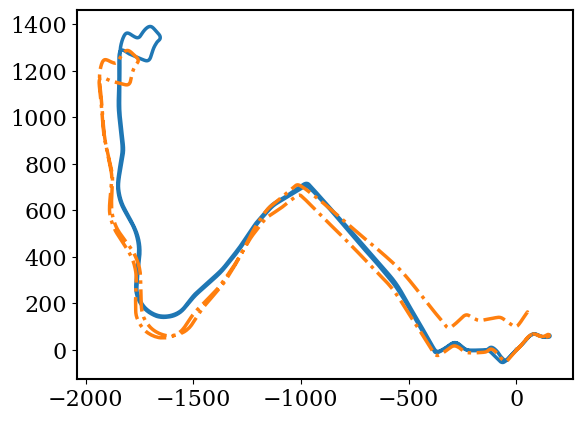

In [21]:
gt_file = osp.join(gt_root, seq, 'applanix', 'lidar_poses.csv')
T_gt = load_gt_poses(gt_file)
T_il0 = np.copy(T_gt[0])
T_li0 = npla.inv(T_il0)

T_gt = [T_li0 @ T for T in T_gt]

steamlio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_poses.txt')
T_steamlio = load_poses(steamlio_file)

xy_steamlio = np.array([[T[0, 3], T[1, 3]] for T in T_steamlio])
N = xy_steamlio.shape[0]
xy_gt = np.array([[T[0, 3], T[1, 3]] for T in T_gt[:N]])
plt.plot(xy_gt[:, 0], xy_gt[:, 1], linewidth=2.5, label='GT')
plt.plot(xy_steamlio[:, 0], xy_steamlio[:, 1], linestyle='-.', linewidth=2.5, label='STEAM-LO')
plt.show()

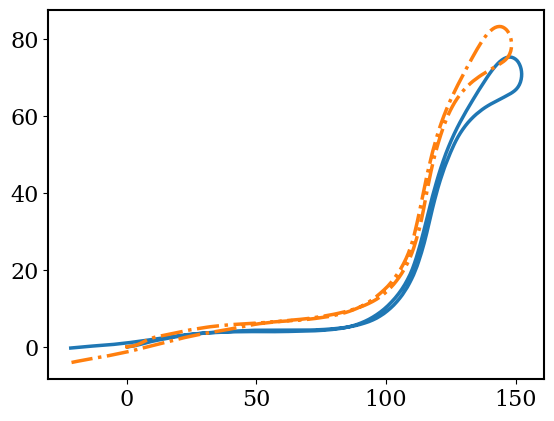

In [22]:
gt_file = osp.join(gt_root, seq, 'applanix', 'radar_poses.csv')
T_gt = load_gt_poses(gt_file)
T_il0 = np.copy(T_gt[0])
T_li0 = npla.inv(T_il0)

T_gt = [T_li0 @ T  for T in T_gt]

steamlio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_velodyne/steamlio/', seq + '_poses.txt')
T_steamlio = load_poses(steamlio_file)

steamrio_file = osp.join('/home/krb/ASRL/temp/steam_icp/boreas_navtech/steamrio/', seq + '_poses.txt')
# steamrio_file = osp.join(root_navtech, 'steamrio', seq + '_poses.txt')
T_steamrio = load_poses(steamrio_file)
zup2zdown = np.array([1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1]).reshape(4, 4)
# T_steamro = [T_lidar_radar @ zup2zdown @ T @ zup2zdown @ T_lidar_radar for T in T_steamro]
T_steamrio = [zup2zdown @ T @ zup2zdown for T in T_steamrio]

xy_steamlio = np.array([[T[0, 3], T[1, 3]] for T in T_steamlio])
xy_steamrio = np.array([[T[0, 3], T[1, 3]] for T in T_steamrio])
# N = xy_steamlio.shape[0]
N = xy_steamrio.shape[0]
xy_gt = np.array([[T[0, 3], T[1, 3]] for T in T_gt[:N]])
plt.plot(xy_gt[:, 0], xy_gt[:, 1], linewidth=2.5, label='GT')
plt.plot(xy_steamrio[:, 0], xy_steamrio[:, 1], linestyle='-.', linewidth=2.5, label='STEAM-RIO')
# plt.plot(xy_steamrio[:, 0], xy_steamrio[:, 1], linestyle='-.', linewidth=2.5, label='STEAM-LIO')
plt.show()

## Velocity estimation performance

In [23]:
seq = 'boreas-2021-11-28-09-18'
def load_velocities(fname):
    w_arr = []
    with open(fname) as f:
        for line in f.readlines():
            w = -1 * np.array([float(x) for x in line.split()][16:24])
            w_arr.append(np.copy(w))
    return w_arr
        
def load_gt_poses(gtfile):
    T_gt = []
    with open(gtfile) as f:
        header = f.readline()
        for line in f.readlines():
            gt = [float(x) for x in line.split(',')]
            T = get_transform(gt)
            T_gt.append(np.copy(T))
    return T_gt

steamro_file = osp.join(root_navtech, 'steamro', seq + '_debug.txt')
w_est = load_velocities(steamro_file)

In [24]:
steamro_file1 = osp.join(root_navtech, 'steamro', seq + '_poses.txt')
T_steamro = load_poses(steamro_file1)
w_est2 = [np.zeros(6)]
for i in range(1, len(T_steamro)):
    T_hat = npla.inv(T_steamro[i]) @ T_steamro[i - 1]
    w = se3op.tran2vec(T_hat) * -4
    w_est2.append(w.squeeze())

In [47]:
gt_file = osp.join(gt_root, seq, 'applanix', 'radar_poses.csv')
def load_gt_velocities(fname):
    gt_vels = []
    with open(fname) as f:
        header = f.readline()
        for line in f.readlines():
            gt = [float(x) for x in line.split(',')]
            T = get_transform(gt)
            v = np.array([gt[4], gt[5], gt[6]]).reshape(3, 1)
            v = T[:3, :3].T @ v
            v2 = np.copy(v)
            v[0] = v2[1]
            v[1] = -v2[0]
            v3 = np.zeros((4, 1))
            v3[:3, :] = v[:]
            v3[3, 0] = gt[10]
            gt_vels.append(v3)
    return gt_vels
gt_vels = load_gt_velocities(gt_file)

In [48]:
idx = 255
print(gt_vels[idx])
print(w_est[idx])
print(w_est2[idx].squeeze())

[[ 5.26785191]
 [-0.17503119]
 [ 0.00914922]
 [-0.0513191 ]]
[ 5.35880832e+00 -2.69572604e-01 -2.85258224e-05 -4.74270364e-05
  8.46476907e-06 -4.93960777e-02 -0.00000000e+00 -0.00000000e+00]
[ 5.19738515e+00 -1.85141229e-01  5.64832102e-05 -7.76127700e-05
 -1.67594323e-06 -4.95848553e-02]


In [49]:
errs1 = []
errs2 = []
for i in range(len(gt_vels)):
    errs1.append((gt_vels[i][0, 0] - w_est[i][0])**2 + (gt_vels[i][1, 0] - w_est[i][1])**2)
    errs2.append((gt_vels[i][0, 0] - w_est2[i][0])**2 + (gt_vels[i][1, 0] - w_est2[i][1])**2)
errs1 = np.array(errs1)
errs2 = np.array(errs2)
print(np.sqrt(np.mean(errs1)))
print(np.sqrt(np.mean(errs2)))

0.16568901037654948
0.17537118460558265


In [54]:
errs1 = []
for i in range(len(gt_vels)):
    errs1.append((gt_vels[i][3, 0] - w_est[i][5])**2)
errs1 = np.array(errs1)
print(np.sqrt(np.mean(errs1)))

0.015459806254468177


In [42]:
errs1 = []
errs2 = []
for i in range(len(gt_vels)):
    errs1.append(gt_vels[i][0, 0] - w_est[i][0])
    errs2.append(gt_vels[i][0, 0] - w_est2[i][0])
errs1 = np.array(errs1)
errs2 = np.array(errs2)
rmse1 = np.sqrt(np.mean(errs1**2))
rmse2 = np.sqrt(np.mean(errs2**2))
print(rmse1)
print(rmse2)

0.14999566803389042
0.15082250960764376


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,
          2.,   1.,   4.,   5.,   9.,   8.,   6.,  13.,  13.,  17.,  25.,
         32.,  47.,  57.,  91., 102., 104., 142., 173., 219., 292., 318.,
        294., 326., 273., 294., 257., 246., 205., 190., 151., 128., 101.,
         94.,  65.,  57.,  33.,  27.,  22.,  18.,  11.,  10.,   2.,   7.,
          2.,   2.,   5.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.25246192e+00, -1.23008361e+00, -1.20770529e+00, -1.18532698e+00,
        -1.16294867e+00, -1.14057036e+00, -1.11819205e+00, -1.09581374e+00,
        -1.07343543e+00, -1.05105712e+00, -1.02867881e+00, -1.00630050e+00,
        -9.83922186e-01, -9.61543876e-01, -9.39165565e-01, -9.16787254e-01,
        -8.944

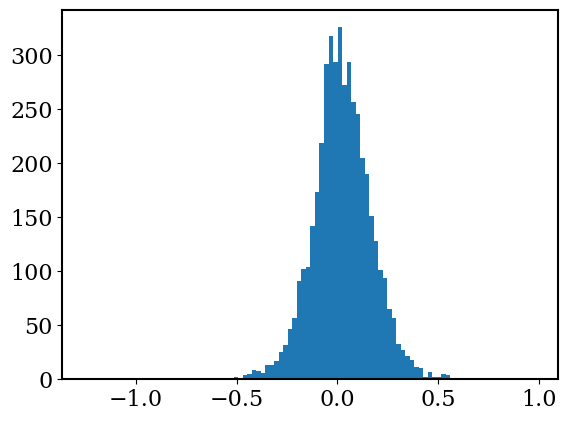

In [29]:
plt.hist(errs1, bins=100)

In [30]:
w_est2[1000]

array([ 1.18448875e+00, -3.22574183e-02, -3.53172558e-06,  5.88767669e-06,
        7.47715258e-07, -8.85812442e-03])

In [31]:
np.mean(errs1)

0.023594579092424593

## KITTI Error vs. Path Length

In [105]:
steamlio_err_file = '/home/krb/Documents/steam_icp/results/boreas_velodyne/steamlio/errs_full.txt'
steamlo_err_file = '/home/krb/Documents/steam_icp/results/boreas_velodyne/steamlo/errs_full.txt'
steamrio_err_file = '/home/krb/Documents/steam_icp/results/boreas_navtech/steamrio/errs_full.txt'
steamro_err_file = '/home/krb/Documents/steam_icp/results/boreas_navtech/steamro/errs_full.txt'

# lidar
errslo = np.zeros((5, 8))
with open(steamlo_err_file) as f:
    for line in f.readlines():
        data = [float(x) for x in line.split()]
        idx = int(round(data[-1] / 100.0)) - 1
        errslo[0, idx] += data[0]
        errslo[1, idx] += data[1]
        errslo[2, idx] += data[2]
        errslo[3, idx] += data[3]
        errslo[4, idx] += 1

errslo[:-1, :] /= errslo[-1, :]
for i in range(8):
    errslo[:-1, i] /= ((i + 1) * 100)
    errslo[:-1, i] *= 100
    errslo[1, i] *= 180 / np.pi
    errslo[3, i] *= 180 / np.pi

# lidar-inertial
errslio = np.zeros((5, 8))
with open(steamlio_err_file) as f:
    for line in f.readlines():
        data = [float(x) for x in line.split()]
        idx = int(round(data[-1] / 100.0)) - 1
        errslio[0, idx] += data[0]
        errslio[1, idx] += data[1]
        errslio[2, idx] += data[2]
        errslio[3, idx] += data[3]
        errslio[4, idx] += 1

errslio[:-1, :] /= errslio[-1, :]
for i in range(8):
    errslio[:-1, i] /= ((i + 1) * 100)
    errslio[:-1, i] *= 100
    errslio[1, i] *= 180 / np.pi
    errslio[3, i] *= 180 / np.pi
    
# radar
errsro = np.zeros((5, 8))
with open(steamro_err_file) as f:
    for line in f.readlines():
        data = [float(x) for x in line.split()]
        idx = int(round(data[-1] / 100.0)) - 1
        errsro[0, idx] += data[0]
        errsro[1, idx] += data[1]
        errsro[2, idx] += data[2]
        errsro[3, idx] += data[3]
        errsro[4, idx] += 1

errsro[:-1, :] /= errsro[-1, :]
for i in range(8):
    errsro[:-1, i] /= ((i + 1) * 100)
    errsro[:-1, i] *= 100
    errsro[1, i] *= 180 / np.pi
    errsro[3, i] *= 180 / np.pi

# radar-inertial
errsrio = np.zeros((5, 8))
with open(steamrio_err_file) as f:
    for line in f.readlines():
        data = [float(x) for x in line.split()]
        idx = int(round(data[-1] / 100.0)) - 1
        errsrio[0, idx] += data[0]
        errsrio[1, idx] += data[1]
        errsrio[2, idx] += data[2]
        errsrio[3, idx] += data[3]
        errsrio[4, idx] += 1

errsrio[:-1, :] /= errsrio[-1, :]
for i in range(8):
    errsrio[:-1, i] /= ((i + 1) * 100)
    errsrio[:-1, i] *= 100
    errsrio[1, i] *= 180 / np.pi
    errsrio[3, i] *= 180 / np.pi

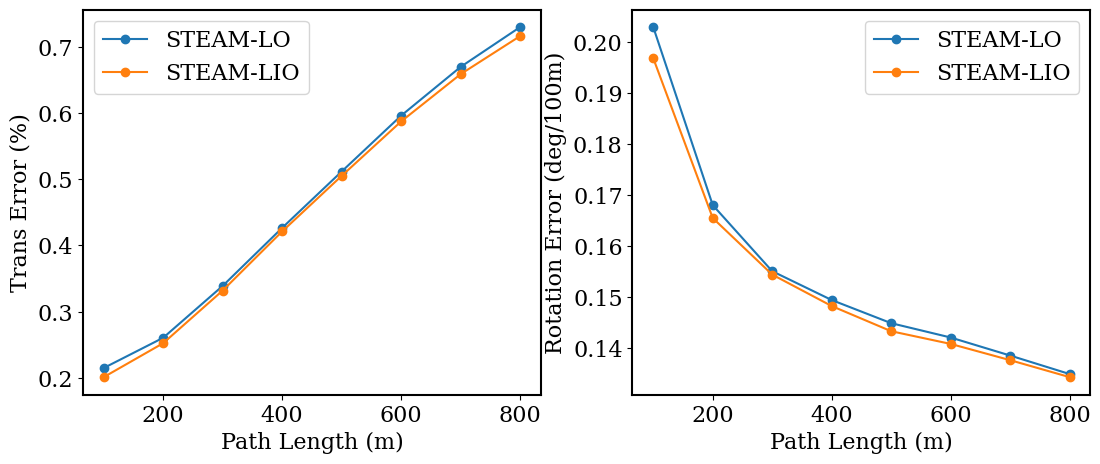

In [108]:
lens = [100, 200, 300, 400, 500, 600, 700, 800]
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].plot(lens, errslo[0, :], marker='o', label='STEAM-LO')
axs[0].plot(lens, errslio[0, :], marker='o', label='STEAM-LIO')
axs[0].legend()
axs[0].set_ylabel('Trans Error (%)')
axs[0].set_xlabel('Path Length (m)')
axs[1].plot(lens, errslo[1, :], marker='o', label='STEAM-LO')
axs[1].plot(lens, errslio[1, :], marker='o', label='STEAM-LIO')
axs[1].set_ylabel('Rotation Error (deg/100m)')
axs[1].set_xlabel('Path Length (m)')
axs[1].legend()
plt.savefig(osp.join(root_navtech, 'kitti-errs-path-lidar.pdf'), bbox_inches='tight', pad_inches=0.0)
plt.show()

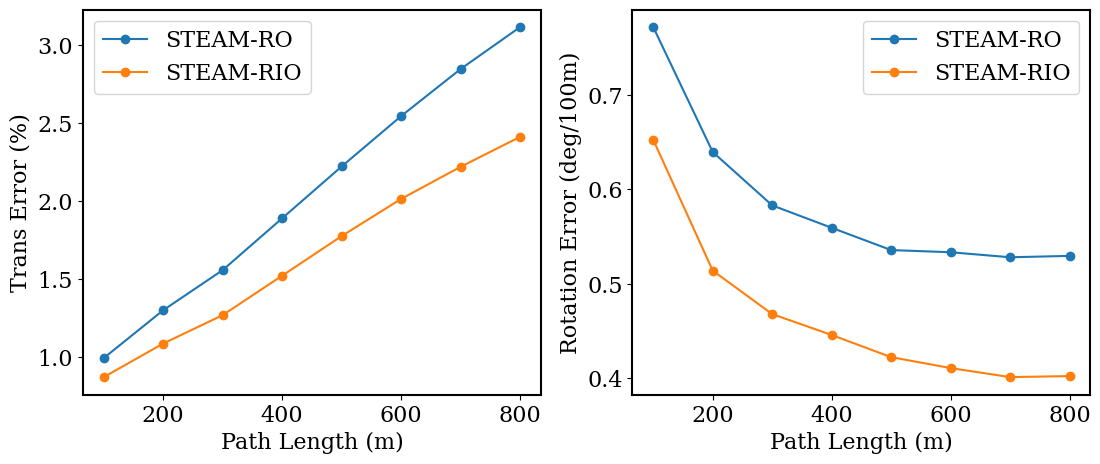

In [107]:
lens = [100, 200, 300, 400, 500, 600, 700, 800]
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].plot(lens, errsro[2, :], marker='o', label='STEAM-RO')
axs[0].plot(lens, errsrio[2, :], marker='o', label='STEAM-RIO')
axs[0].set_ylabel('Trans Error (%)')
axs[0].set_xlabel('Path Length (m)')
axs[0].legend()
axs[1].plot(lens, errsro[3, :], marker='o', label='STEAM-RO')
axs[1].plot(lens, errsrio[3, :], marker='o', label='STEAM-RIO')
axs[1].set_ylabel('Rotation Error (deg/100m)')
axs[1].set_xlabel('Path Length (m)')
axs[1].legend()
plt.legend()
plt.savefig(osp.join(root_navtech, 'kitti-errs-path-radar.pdf'), bbox_inches='tight', pad_inches=0.0)
plt.show()